<a href="https://colab.research.google.com/github/Adila02/portfolio/blob/main/dataset_estudantes_online1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*EXEMPLO *

**objetivo**

Tentar identificar correlações da performace do estudo online utilizando algoritmos de classificação em ML

*Dados de exemplo de um Dataset retirado do Kaggle

*Dados não minerados

In [1]:
#Bibliotecas default
import pandas as pd
import seaborn as sns
#Importação de classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#Install do dask[DataFrame]
pip install dask[dataframe]


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 6.4 MB/s eta 0:00:00


In [4]:
import os
# Listar arquivos no diretório atual
print(os.listdir('/content/'))

['.config', 'Math.csv', '.ipynb_checkpoints', 'sample_data']


In [5]:
data= pd.read_csv('/content/Math.csv')

In [6]:
#Verificação das primeiras linhas
print(data.head())

  Gender Home Location Level of Education  Age(Years)  Number of Subjects  \
0   Male         Urban     Under Graduate          18                  11   
1   Male         Urban     Under Graduate          19                   7   
2   Male         Rural     Under Graduate          18                   5   
3   Male         Urban     Under Graduate          18                   5   
4   Male         Rural     Under Graduate          18                   5   

  Device type used to attend classes Economic status  Family size  \
0                             Laptop    Middle Class            4   
1                             Laptop    Middle Class            4   
2                             Laptop    Middle Class            5   
3                             Laptop    Middle Class            4   
4                             Laptop    Middle Class            4   

   Internet facility in your locality Are you involved in any sports?  ...  \
0                                   5       

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [8]:
# Verificando os valores únicos de cada coluna do tipo object
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column}: {data[column].unique()}")

Gender: ['Male' 'Female']
Home Location: ['Urban' 'Rural']
Level of Education: ['Under Graduate' 'Post Graduate' 'School']
Device type used to attend classes: ['Laptop' 'Desktop' 'Mobile']
Economic status: ['Middle Class' 'Poor' 'Rich']
Are you involved in any sports?: ['No' 'Yes']
Do elderly people monitor you?: ['Yes' 'No']
Interested in Gaming?: ['No' 'Yes']
Have separate room for studying?: ['No' 'Yes']
Engaged in group studies?: ['No' 'yes']
Average marks scored before pandemic in traditional classroom: ['91-100' '71-80' '81-90' '61-70' '31-40' '41-50' '21-30' '11-20' '51-60'
 '0-10']
Interested in?: ['Practical' 'Theory' 'Both']
Your level of satisfaction in Online Education: ['Average' 'Bad' 'Good']


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Verificando os valores únicos de cada coluna do tipo inteiro
for column in data.select_dtypes(include=['int64']).columns:
    print(f"{column}: {data[column].unique()}")

Age(Years): [18 19 17 20 25 21 23 24 22 26  9 38 37 12 40 34 27 28 30 32 39 35 29 36]
Number of Subjects: [11  7  5  4  9  6 20  8  3  2 17 15  1 14 16 18 12 10 19 13]
Family size: [ 4  5  3  2  6  7  9 10  8]
Internet facility in your locality: [5 1 2 4 3]
Study time (Hours): [ 3  7  6  8  2  4  5  1 10  9]
Sleep time (Hours): [ 6  5  7  8  9  2 10  3  4  1]
Time spent on social media (Hours): [ 1  2  3  6  5  4  8 10  7  9]
Your interaction in online mode: [1 3 4 2 5]
Clearing doubts with faculties in online mode: [1 2 3 4 5]
Performance in online: [ 6  3  4  2  9  7  5 10  8]


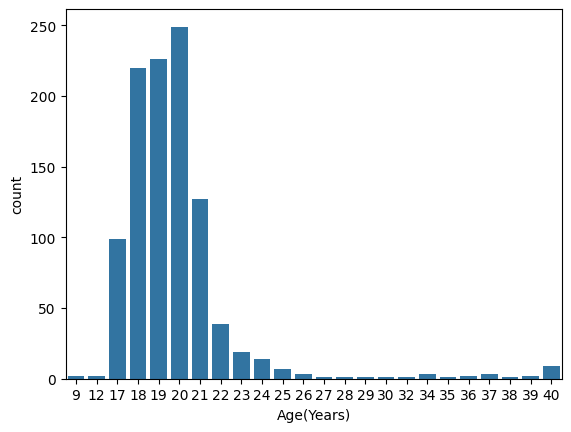

In [11]:
#Analise exploratória da variável 0
data['Age(Years)'].value_counts()
graf = sns.countplot(x ='Age(Years)', data=data)

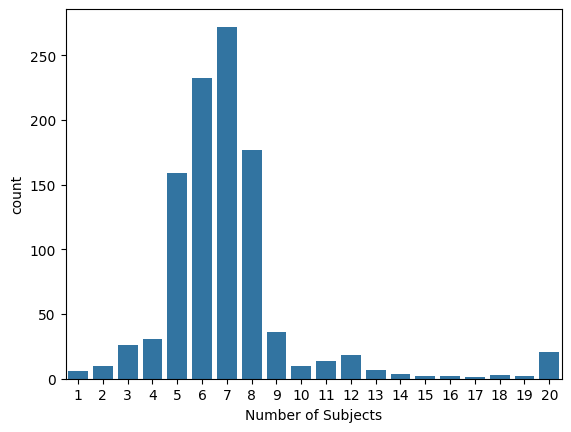

In [12]:
#Analise exploratória da variável 1
data['Number of Subjects'].value_counts()
graf = sns.countplot(x ='Number of Subjects', data=data)

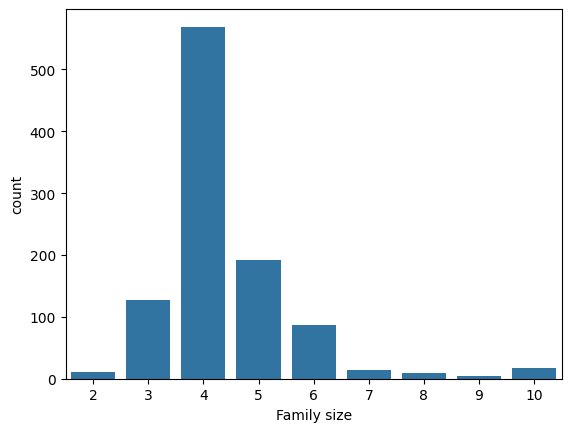

In [13]:
#Analise exploratória da variável 2
data['Family size'].value_counts()
graf = sns.countplot(x ='Family size', data=data)

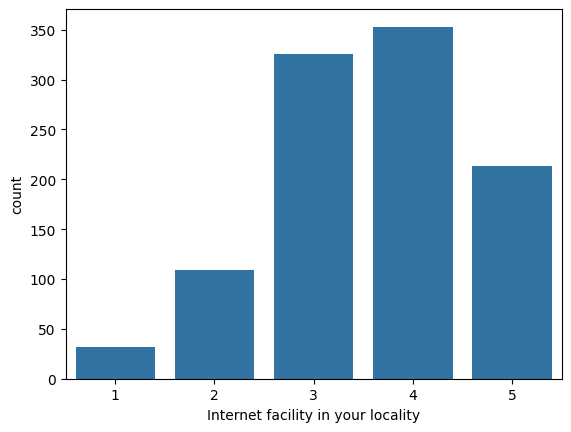

In [14]:
#Analise exploratória da variável 3
data['Internet facility in your locality'].value_counts()
graf = sns.countplot(x ='Internet facility in your locality', data=data)

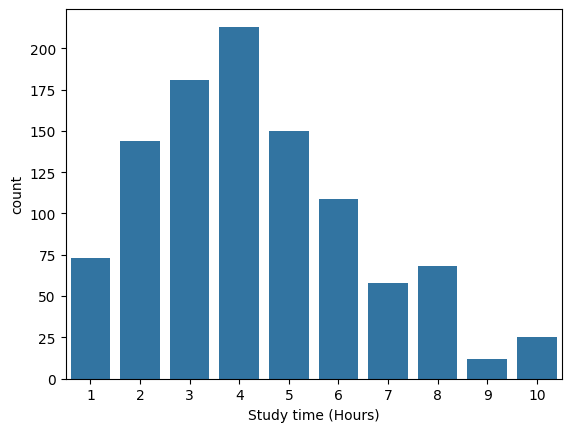

In [15]:
#Analise exploratória da variável 4
data['Study time (Hours)'].value_counts()
graf = sns.countplot(x ='Study time (Hours)', data=data)

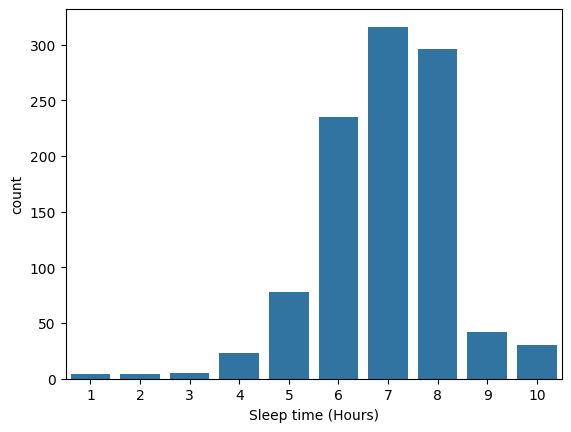

In [16]:
#Analise exploratória da variável 5
data['Sleep time (Hours)'].value_counts()
graf = sns.countplot(x ='Sleep time (Hours)', data=data)

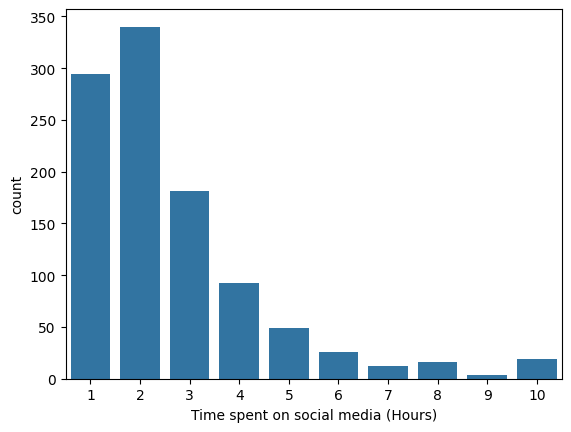

In [17]:
#Analise exploratória da variável 6
data['Time spent on social media (Hours)'].value_counts()
graf = sns.countplot(x ='Time spent on social media (Hours)', data=data)

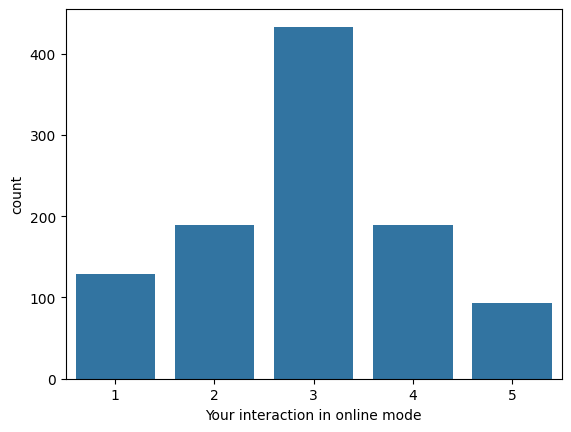

In [18]:
#Analise exploratória da variável 7
data['Your interaction in online mode'].value_counts()
graf = sns.countplot(x ='Your interaction in online mode', data=data)

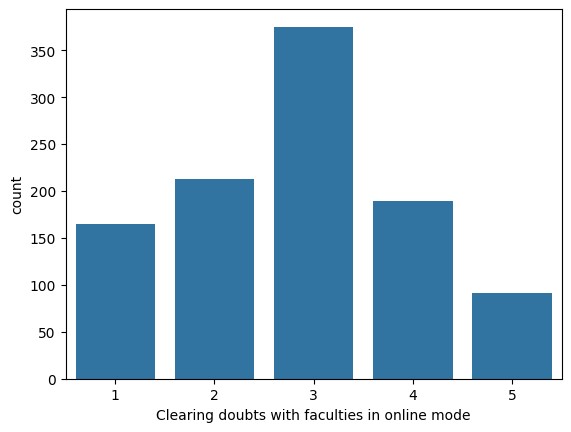

In [19]:
#Analise exploratória da variável 8
data['Clearing doubts with faculties in online mode'].value_counts()
graf = sns.countplot(x ='Clearing doubts with faculties in online mode', data=data)

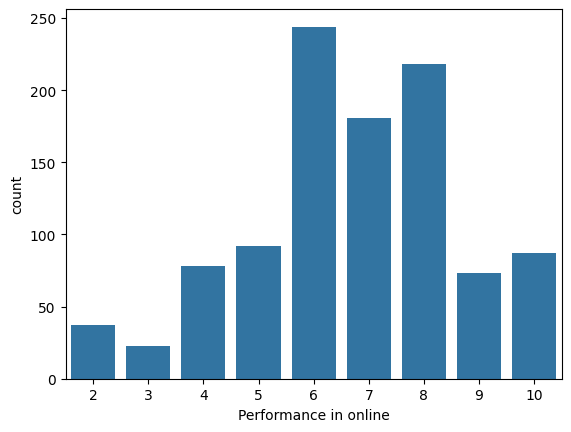

In [20]:
#Analise exploratória da variável 9
data['Performance in online'].value_counts()
graf = sns.countplot(x ='Performance in online', data=data)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


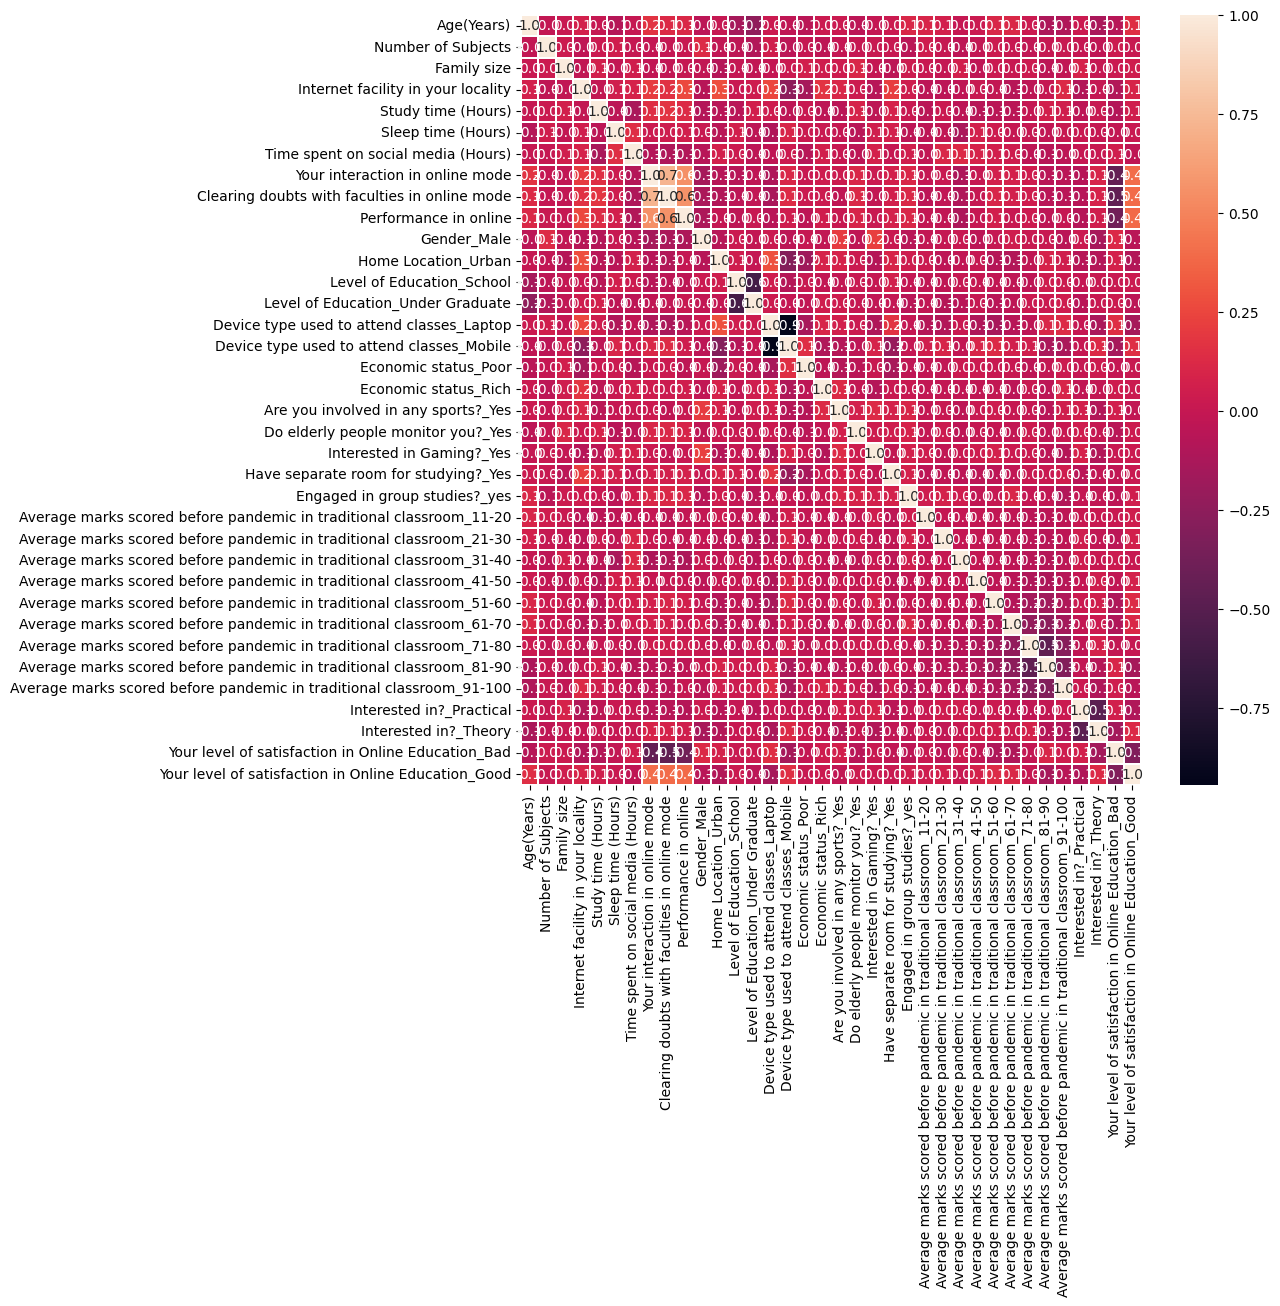

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converte variáveis categóricas em variáveis numéricas
data_numeric = pd.get_dummies(data, drop_first=True)

# Mapa de correlação
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_numeric.corr(), annot=True, linewidths=0.05, fmt='.1f', ax=ax)
plt.show()


**PRÉ PROCESSAMENTO DOS DADOS**

*Dados de exemplo de um Dataset

*Dados não minerados



In [41]:
#Take the fields of interest and plug them into variable X
x = data[['Age(Years)','Number of Subjects','Family size','Internet facility in your locality','Study time (Hours)','Sleep time (Hours)','Time spent on social media (Hours)','Your interaction in online mode','Clearing doubts with faculties in online mode']]
#Make sure to provide the corresponding truth value
y=data['Performance in online'].values.tolist()

#Split the data into test and training (30% for test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



**PREDICTION IN MACHINE LEARNING** (ML)

In [ ]:
#Comparando os algoritmos de classificação

#clf = SVC()
#clf = LogisticRegression()
#clf = DecisionTreeClassifier()
#clf = KNeighborsClassifier()
#clf = MLPClassifier()
#clf = RandomForestClassifier()
#clf = GradientBoostingClassifier()
#clf = XGBClassifier()
#clf = LGBMClassifier()


#clf=classificador



In [65]:
#Criando o classificador com o algoritmo a ser avaliado
clf = LGBMClassifier()



In [66]:
#Training the classifier using the train data
clf = clf.fit(x_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 9
[LightGBM] [Info] Start training from score -3.287572
[LightGBM] [Info] Start training from score -4.018460
[LightGBM] [Info] Start training from score -2.594425
[LightGBM] [Info] Start training from score -2.472535
[LightGBM] [Info] Start training from score -1.465415
[LightGBM] [Info] Start training from score -1.685569
[LightGBM] [Info] Start training from score -1.514505
[LightGBM] [Info] Start training from score -2.733262
[LightGBM] [Info] Start training from score -2.472535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [67]:
#Avaliation of Machine learning

#validate the classifier

accuracy = clf.score(x_test, y_test)
print('accuracy: ' + str(accuracy))

#Make a confusion matrix

prediction = clf.predict(x_test)

cm = confusion_matrix(prediction,y_test)
cr = classification_report(prediction, y_test)

print(cm)
print(cr)


accuracy: 0.26129032258064516
[[ 1  1  2  2  3  0  4  0  1]
 [ 0  2  0  0  0  1  1  0  0]
 [ 1  2  3  2  5  3  1  0  1]
 [ 0  0  6  2  4  3  1  2  0]
 [ 4  3  9 13 29  8 10  4  4]
 [ 0  1  2  6 18 14 19  4  4]
 [ 4  1  2  6 17 13 20 11  8]
 [ 0  0  0  0  0  3  1  3  1]
 [ 0  0  0  0  1  2  2  2  7]]
              precision    recall  f1-score   support

           2       0.10      0.07      0.08        14
           3       0.20      0.50      0.29         4
           4       0.12      0.17      0.14        18
           5       0.06      0.11      0.08        18
           6       0.38      0.35      0.36        84
           7       0.30      0.21      0.24        68
           8       0.34      0.24      0.28        82
           9       0.12      0.38      0.18         8
          10       0.27      0.50      0.35        14

    accuracy                           0.26       310
   macro avg       0.21      0.28      0.22       310
weighted avg       0.29      0.26      0.27      

In [68]:
from sklearn.metrics import f1_score

# Calculando o F1-score ponderado
y_true = y_test
y_pred = clf.predict(x_test)
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("F1-score ponderado: ", f1_weighted)

F1-score ponderado:  0.25567126614902475


**Resultados**


**#clf = SVC()**

Acuracia  
29,03% = low

F1-Score Ponderado
0.41= 41% = low

**#clf = LogisticRegression()**

Acuracia  
28,38% = low

F1-Score Ponderado
0.34= 34% = low

**#clf = DecisionTreeClassifier()**

Acuracia  
18,70% = low

F1-Score Ponderado
0.20= 20% = low

**#clf = KNeighborsClassifier()**

Acuracia  
27,74% = low

F1-Score Ponderado
0.259= 26% = low


**#clf = MLPClassifier()**

Acuracia  
28,70% = low

F1-Score Ponderado
0.258= 26% = low

**#clf = RandomForestClassifier()**

Acuracia  
27,74% = low

F1-Score Ponderado
0.266= 27% = low

**#clf = GradientBoostingClassifier()**

Acuracia  
28,38% = low

F1-Score Ponderado
0.266= 27% = low

**#clf = LGBMClassifier()**

Acuracia  
26,12% = low

F1-Score Ponderado
0.255= 26% = low

*#XGBClassifier()














 *Conclusão Geral*

 -Desempenho Insatisfatório

 **Possíveis Causas**



*   Dados desbalanceados
*   Caracteristicas dos dados
*   Escolha do modelo

**Possíveis Soluções**


*   Análise mais profunda dos dados
*   Melhorar o pré-processamento
*   Ajuste de hiperparâmetros
*   Explorar novos modelos





